# Projeto Experimental/Capstone Project - 911 Calls

Neste projeto, será explorado o dataset Emergency 911 Calls Montgomery County (Chamadas de Emergência do 911 do Condado de Montgomery) como parte de um dos projetos para o curso "Python for Data Science and Machine Learning bootcamp" (Bootcamp de Python para Ciência de Dados e Aprendizagem de Máquina) da Udemy. O projeto inclui baixar e importar um arquivo CSV no Python utilizando a biblioteca Pandas, e visualização e análise da dados usando Matplotlib e Seaborn. 

Os dados são de um Kernel do [Kaggle](https://www.kaggle.com/mchirico/montcoalert) obtido em Maio de 2022, contendo dados até 2020 (conforme a análise descobriu). Visualizaremos o conjunto de dados para analizar e extrair insights, perspectivas e hipóteses. Então vamos começar importando bibliotecas relevantes já planejadas para a atividade, bem como importar o conjunto de dados.

### Setting up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importando os dados num Data Frame do Pandas
df = pd.read_csv('911.csv')

### Extraindo informação

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

Então temos 660k+ linhas de dados e 8 colunas. As colunas consistem em:
  
`lat` - Latitude (numeric float64)   
`lng` - Longitude (numeric, float64)  
`desc` - Descrição da chamada (string)  
`zip` - Zip code, o "CEP" (numeric, float64)  
`title` - Título da chamada (provavelmente a razão dela) (string)  
`timeStamp` - Timestamp de quando a chamada ocorreu (ainda que num formato string, e não `date`)  
`twp` - Tonwship, Cidade/Município (string)  
`addr` - Endereço (string)  
`e` - variável dummy? É sempre 1 (numeric, int64)

Muito bem, vamos explorar os dados um pouco.

In [6]:
# checando por missing data, dados faltantes
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

Há uma certa quantidade de zip codes faltando no dataset (em torno de 12% do total de linhas), e algumas linhas em township também. É possível ver que, que chamando `df.head()`, em uma das primeiras linhas há um NaN na coluna `zip`. Poderemos tomar isto em conta quando avançarmos, especialmente para o caso de lidar diretamente com `zip` e `twp`, como nos seguintes casos:

In [7]:
# top 5 de zip codes em quantidade de chamadas
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
# top 5 de municípios
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [9]:
# quantos municípios existem no total, neste dataset
df['twp'].nunique()

68

Tendo dito isto, os dados acima ainda provêm informações válidas e importantes. Os townships e zip codes informados podem ajudar o pessoal responsável (e autorizado) a investigar nos municípios, distritos e bairros as razões que mais chamadas vêm de um do que de outro, e o que pode ser feito além disso.

### Extraindo as razões para as chamadas

Vamos checar a coluna `titles` e tentar ver quantas razões únicas existem para uma chamada:

In [10]:
df['title'].nunique()

148

In [11]:
df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
663517    Traffic: VEHICLE ACCIDENT -
663518          EMS: GENERAL WEAKNESS
663519          EMS: VEHICLE ACCIDENT
663520            Fire: BUILDING FIRE
663521    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 663522, dtype: object

Os títulos tem duas partes, uma categoria e uma breve descrição, separadas por dois pontos (:). Vamos isolá-los em outra coluna:

In [12]:
df['reason']=df['title'].apply(lambda x:x.split(':')[0])
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [13]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

Agora temos a coluna `reason`, com a categoria principal de cada chamada, e podemos observá-los mais de perto:

Text(0.5, 0, 'Reason')

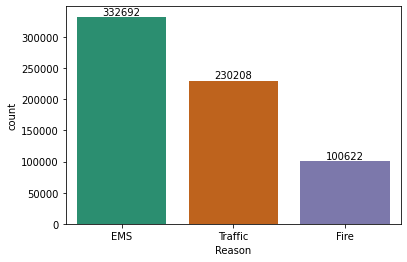

In [14]:
# visualizando os dados em um gráfico de barras - bar graph - com os valores sobre eles
reason_order=df['reason'].value_counts()
ax1=sns.countplot(x='reason',data=df,palette='Dark2',order=reason_order.index)
ax1.bar_label(container=ax1.containers[0],labels=reason_order.values)
ax1.set_xlabel("Reason")

É possível ver no gráfico acima que "Fire" (Fogo, Incêndio) é o motivo com menores chamadas, enquanto EMS (Emergency Medical Services, Serviços Médicos de Emergência)  acontecem com a maior frequência, separados por "Traffic" (Incidentes de Trânsito).

### Ampliando dados temporais (time)

Vamos agora olhar o dataset de acordo com a faixa de tempo:

In [15]:
# checando o tipo de dados da coluna timeStamp
type(df['timeStamp'][0])

str

In [16]:
# convertendo timeStamp de string para date
df['timeStamp']=pd.to_datetime(df['timeStamp'])

# checando. o tipo deverá ser datetime. (Pandas chama de Timestamp)
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Foi necessário converter a coluna `timeStamp` de string para date, para que pudesse ser melhor analisada como dados temporais de fato. Agora podemos adicionar outras colunas baseadas na informação de tempo. Por exemplo, podemos falar em termos de hora, dia da semana, mês, ano e a data mesmo.

In [17]:
# criando novas colunas e aplicando (.apply) funções quando necessário
# mês e dia da semana são criados com 'num' primeiro
# e mais tarde poderão ter colunas categóricas com os nomes de meses e dias

df['date']=df['timeStamp'].apply(lambda x:x.date())
df['date']=pd.to_datetime(df['date'])
df['year']=df['timeStamp'].apply(lambda x:x.year)
df['hour']=df['timeStamp'].apply(lambda x:x.hour)
df['dayofweeknum']=df['timeStamp'].apply(lambda x:x.dayofweek)
df['monthnum']=df['timeStamp'].apply(lambda x:x.month)


In [18]:
# checando as colunas novas
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason       date  year  hour  dayofweeknum  \
0      REINDEER CT & DEAD END  1    EMS 2015-12-10  2015    17             3   
1  BRIAR PATH & WHITEMARSH LN  1    EMS 2015-12-10  2015    17             3   
2                    HAWS AVE  1   Fire 2015-12-10  2015    14             3   
3          AIRY ST & SWEDE ST  1    EMS 2015-12-10  2015    16             3   
4    CHERRYWOOD CT & DEAD END  1    EMS 2015-12-10  2015    16             3   

   monthnum  
0        12  
1        12  
2        12  
3        12  
4        12

Uma vez que mês e dia da semana são numéricos, vamos criar duas colunas com dados de texto, em string, mapeando os respectivos números a nomes.

No caso, para `month`, 1 se torna Jan (janeiro), 2 vira Feb (fevereiro), e assim por diante. Em `dayofweek` 0 é Mon (segunda-feira), 1 is Tue (terça-feira), etc.

In [19]:
from datetime import date, datetime

# selecionando algum tempo conhecido no passado só para preencher listas com uma semana e um ano
# para que possamos recuperar dados automaticamente, usando list comprehension
daylist = [date(2001,1,i).strftime('%a') for i in range(1,8)]
monthlist = [date(2001,i,1).strftime('%b') for i in range(1,13)]

# agora usando dict comprehension para encaminhar o .map mais adiante
daymap = {x:daylist[x] for x in range(len(daylist))}
monthmap = {x+1:monthlist[x] for x in range(len(monthlist))}

In [20]:
# mapeando das colunas de tipo 'num' para str
# existia um método weekday_name no Pandas mas está obsoleto há bastante tempo
df['dayofweek']=df['dayofweeknum'].map(daymap)
df['month']=df['monthnum'].map(monthmap)

In [21]:
# vejamos as novas colunas
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason       date  year  hour  dayofweeknum  \
0      REINDEER CT & DEAD END  1    EMS 2015-12-10  2015    17             3   
1  BRIAR PATH & WHITEMARSH LN  1    EMS 2015-12-10  2015    17             3   
2                    HAWS AVE  1   Fire 2015-12-10  2015    14             3   
3          AIRY ST & SWEDE ST  1    EMS 2015-12-10  2015    16             3   
4    CHERRYWOOD CT & DEAD END  1    EMS 2015-12-10  2015    16             3   

   monthnum dayofweek month  
0        12       Thu   Dec  
1        12       Thu   Dec  
2        12       Thu   Dec  
3        12       Thu   Dec  
4        12       Thu   Dec

Agora que temos variáveis temporais, podemos visualizar os dados por mês, por ano, etc. Vamos começar com dia da semana.

Text(0.5, 0, 'Calls by day of week')

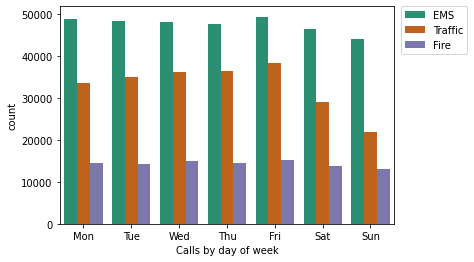

In [22]:
plt.figure()#figsize=(15,4))
ax2=sns.countplot(x='dayofweek',data=df,hue='reason',palette='Dark2',order=daylist,hue_order=reason_order.index)

# se for necessário/desejado um gráfico com valores no topo, descomente a seção abaixo
# e use figzise(15,4) para os números caberem bem, ou ajuste como preferir
# daycount cria um numpy.ndarray de tamanho (7,3) com os valores EMS, Traffic e Fire (3) para cada dia (7)

# daycount = df[['dayofweeknum','reason']].groupby(by='dayofweeknum').value_counts().values.reshape(7,3).T
# for c in range(len(ax2.containers)):
#     ax2.bar_label(container=ax2.containers[c],labels=daycount[c])

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('Calls by day of week')

Em uma rápida olhada, os dias de fim de semana geram menos chamadas do 911, em especial chamadas de Traffic.

Agora observaremos os dados mensais:

Text(0.5, 0, 'Calls by month')

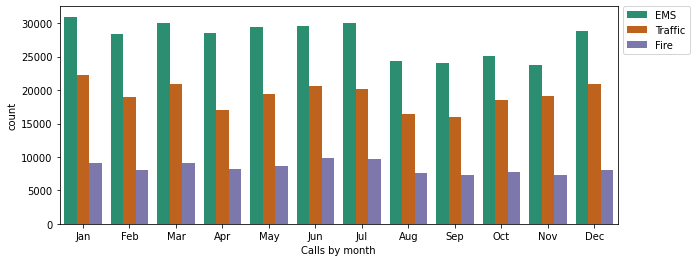

In [23]:
plt.figure(figsize=(10,4))#figsize=(24,5))
ax3=sns.countplot(x='month',data=df,hue='reason',palette='Dark2',order=monthlist,hue_order=reason_order.index)

# se for necessário/desejado um gráfico com valores no topo, descomente a seção abaixo
# e use figzise(24,5) para os números caberem bem, ou ajuste como preferir
# monthcount cria um numpy.ndarray de tamanho (12,3) com os valores EMS, Traffic e Fire (3) para cada mês (12)

# monthcount = df[['monthnum','reason']].groupby(by='monthnum').value_counts().values.reshape(12,3).T
# for c in range(len(ax3.containers)):
#     ax3.bar_label(container=ax3.containers[c],labels=monthcount[c],label_type='edge')

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax3.set_xlabel('Calls by month')

In [24]:
df['date'].max()

Timestamp('2020-07-29 00:00:00')

In [25]:
df['date'].min()

Timestamp('2015-12-10 00:00:00')

À primeira vista, há uma depressão nos dados de Agosto a Novembro, como se houvessem menos ocorrências (especialmente EMS) durante tais meses. Minha hipótese é que simplesmente faltam dados, pois o dataset começa em 2015-12-10 e termina em 2020-07-29. Poderemos analisar isso mais tarde.

Vejamos os dados anuais também, agora com alguns números adicionados no gráfico. 2015 possui uma quantidade reduzida de dados, uma vez que os dados começam em 2015-12-10, portanto sequer um mês completo de dados para 2015:

Text(0.5, 0, 'Calls by year')

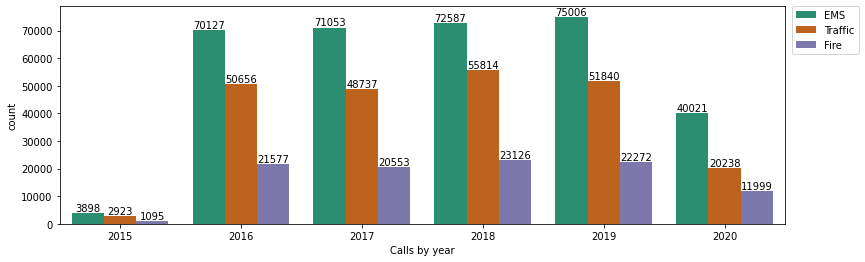

In [26]:
plt.figure(figsize=(13,4))
ax4 = sns.countplot(x='year',data=df,hue='reason',palette='Dark2',hue_order=reason_order.index)

# se for necessário/desejado um gráfico com valores no topo, descomente a seção abaixo
# e use figzise(13,4) para os números caberem bem, ou ajuste como preferir
# yearcount cria um numpy.ndarray de tamanho (df['year'].unique().size,3) com os
# valores EMS, Traffic e Fire (3) para cada ano (df['year'].unique().size,3) no dataset
# procedi assim pois semanas sempre têm 7 dias e um ano sempre tem 12 meses
# mas possíveis versões futuras do dataset podem conter mais anos

yearcount = df[['year','reason']].groupby(by='year').value_counts().values.reshape(df['year'].unique().size,3).T
for c in range(len(ax4.containers)):
    ax4.bar_label(container=ax4.containers[c],labels=yearcount[c])

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax4.set_xlabel('Calls by year')

2020 também possui menos dados: o dataset para em Julho, o que pode explicar aquela falta de dados de Agosto a Novembro. Além disso, tivemos um importante evento global, a pondemia do COVID-19, que influenciou fortemente as tendências de dados ao redor do mundo. Completar outro ano de dados necessitaria um "ano padrão de dados" até, pelo menos, Novembro de 2020.

Vamos observar a tendência das chamadas mês a mês, tomando como referência a faixa completa do dataset.

Text(0.5, 0, 'Calls by every month of the database')

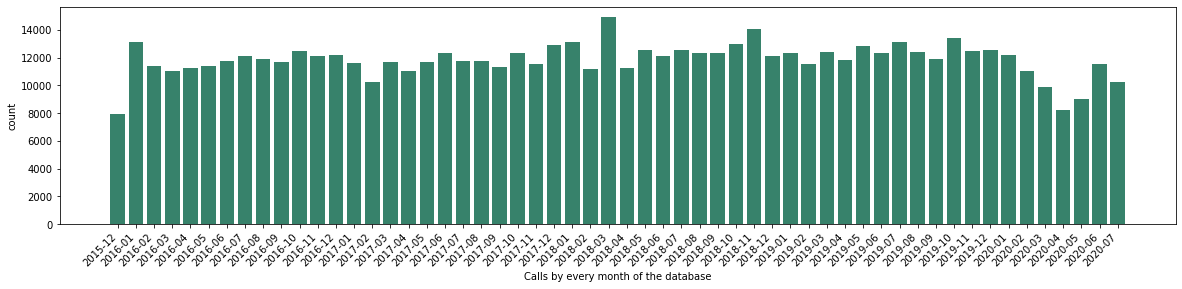

In [27]:
plt.figure(figsize=(20,4))
ax5=sns.countplot(x=df['timeStamp'].dt.to_period('M'),data=df,color='#2b8e70')
plt.xticks(rotation=45,ha='right')
plt.plot() 
ax5.set_xlabel('Calls by every month of the database')

Portanto, os meses com menos dados aparentam ser apenas por um 2020 incompleto. Ainda há uma redução nos dados no início de 2020 (Março a Maio), bastante próxima à declaração de pandemia pela OMS e os subsequentes lockdowns ao redor do planeta.

Observamos os dados referentes a chamadas. Vamos agora passar a observá-los agrupando por meses. Primeiro, desenhemos uma linha para um olhar diferente.

<AxesSubplot:xlabel='monthnum'>

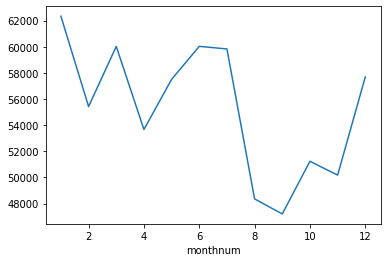

In [28]:
# vamos agregar os dados por mês
df.groupby('monthnum').count()['reason'].plot()

Ah, temos algumas subidas e descidas aqui, então utilizaremos uma regressão linear para generalizar os dados um pouco melhor.

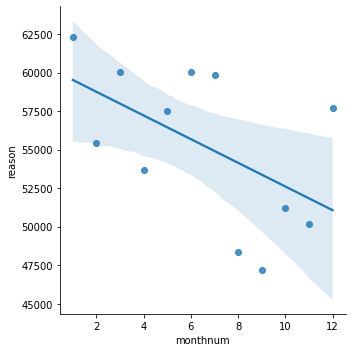

In [29]:
sns.lmplot(x='monthnum',y='reason',data=df.groupby('monthnum').count().reset_index())

A regressão linear nos mostra uma linha de tendência negativa, puxada para baixo sobretudo pelos meses de Agosto a Novembro. Temos uma variância um tanto larga nos meses finais do dataset - mostrado pela sombra azul-claro - pois Dezembro soma mais dados que, por exemplo, Novembro e Outubro. Porém também alguma variância nos meses iniciais, já que os valores de Janeiro a Maio flutuam um pouco.

E se analisássemos mais profundamente, plotando uma linha para cada razão de chamada, e sua regressão linear respectiva?

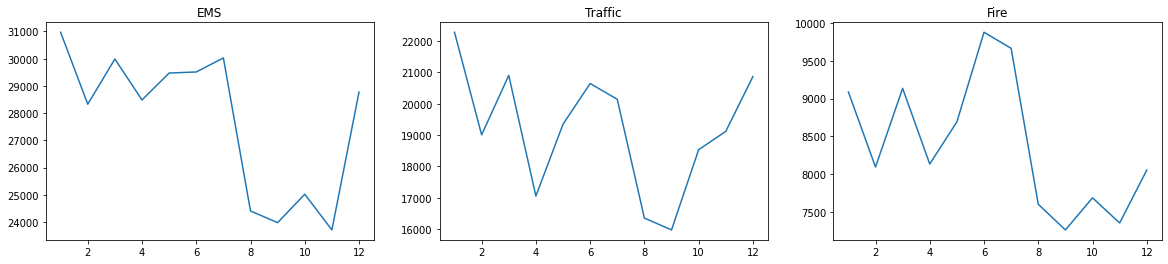

In [30]:
fig,axes=plt.subplots(ncols=len(reason_order),figsize=(20,4))
for i in range(len(reason_order.index)):
    axes[i].plot(df[df['reason']==reason_order.index[i]].groupby(by='monthnum').count()['title'])
    axes[i].set_title(reason_order.index[i])

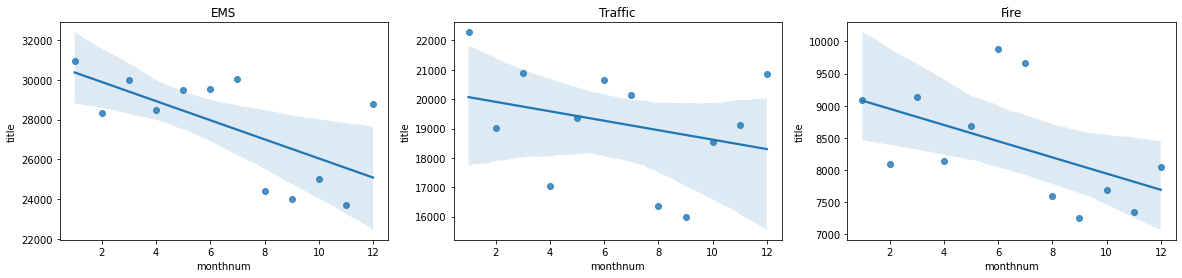

In [31]:
fig1,axes1=plt.subplots(ncols=len(reason_order),figsize=(20,4))
for i in range(len(reason_order)):
    sns.regplot(x='monthnum',y='title',data=df[df['reason']==reason_order.index[i]].groupby(by='monthnum').count().reset_index(),ax=axes1[i])
    axes1[i].set_title(reason_order.index[i])

É interessante observar que as chamadas por EMS até Julho não variam muito (como mostrado pela menor variação no gráfico de linha, e pelos pontos mais próximos e a (menos larga) sombra azul-claro). Essa tendência é quebrada provavelmente devido a menos dados de Ago-Nov. Sendo a maior razão para chamadas em geral, poderia ter uma linha mais plana ao longo do ano.

Chamadas por Traffic, por outro lado, parecem muito mais frequentes em Outubro e Novembro do que EMS e Fire, e sua regressão linear é, de fato, a mais plana dos três. Todavia, esse caso se mostra com uma variância muito maior que as outras razões, principalmente no início e no fim do ano. Isso pode ser devido, por exemplo, aos grandes picos em Janeiro e Dezembro, e uma depressão em Abril comparável (visualmente, em princípio) a Agosto e Setembro. Por fim, a razão Fire possuem um pico diferente dos outros, no meio do ano, em Junho e Julho.

Observamos os dados mês a mês, agora vamos plotar uma linha baseada em dias; uma vez que temos a coluna `date` nós podemos usá-la e investigar nosso dataset um pouco mais.

Text(0, 0.5, 'count')

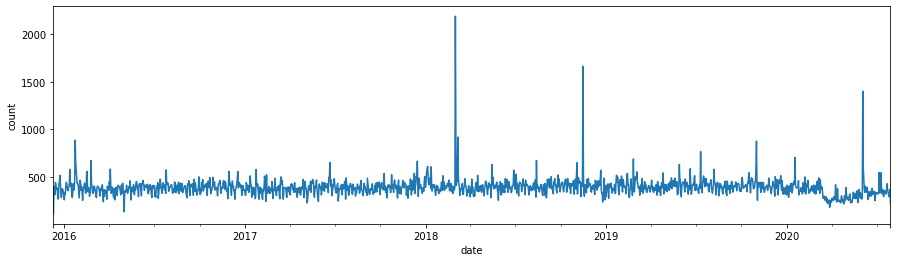

In [32]:
df.groupby('date').count().plot.line(use_index=True,y='title',figsize=(15,4),legend=None)
plt.ylabel('count')

Notamos aqui três outliers bem grandes aqui! Dois em 2018, cada um em um semestre. E um em 2020. Há outros outliers menores (se podemos dizer isso), porém, focaremos nesses três. Primeiro, 2018.

Text(0, 0.5, 'count')

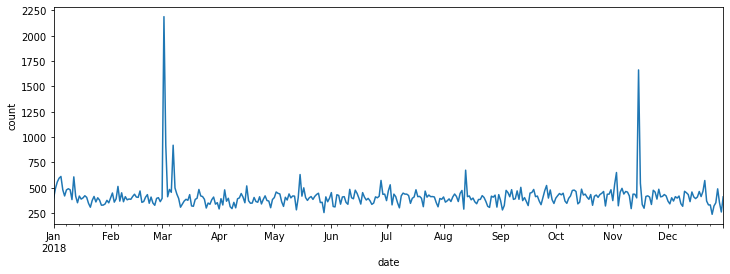

In [33]:
df.groupby(df[df['year']==2018]['date']).count().plot.line(use_index=True,y='title',figsize=(12,4),legend=None)
plt.ylabel('count')

O primeiro grande pico é em Março, o segundo aparenta ser Novembro. Agora vamos isolá-los e rastrear qual dia deve compreendê-los.

In [34]:
df.groupby(df[(df['year']==2018)&(df['monthnum']==3)]['date']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
date                                                                     
2018-03-01   396   396   396   354    396        396   396   396   396   
2018-03-02  2187  2187  2187  1986   2187       2187  2187  2187  2187   
2018-03-03   917   917   917   836    917        917   917   917   917   
2018-03-04   412   412   412   369    412        412   412   412   412   
2018-03-05   484   484   484   439    484        484   484   484   484   
2018-03-06   456   456   456   397    456        456   455   456   456   
2018-03-07   920   920   920   824    920        920   920   920   920   
2018-03-08   499   499   499   449    499        499   499   499   499   
2018-03-09   439   439   439   396    439        439   439   439   439   
2018-03-10   395   395   395   353    395        395   395   395   395   
2018-03-11   309   309   309   266    309        309   309   309   309   
2018-03-12   340   340   340   293    340        340   340   340   340   
2018-03-13   370   370   370   319    370        370   370   370   370   
2018-03-14   387   387   387   343    387        387   387   387   387   
2018-03-15   377   377   377   340    377        377   377   377   377   
2018-03-16   433   433   433   380    433        433   433   433   433   
2018-03-17   322   322   322   291    322        322   322   322   322   
2018-03-18   318   318   318   277    318        318   318   318   318   
2018-03-19   386   386   386   341    386        386   386   386   386   
2018-03-20   397   397   397   322    397        397   397   397   397   
2018-03-21   484   484   484   427    484        484   484   484   484   
2018-03-22   420   420   420   370    420        420   420   420   420   
2018-03-23   414   414   414   373    414        414   412   414   414   
2018-03-24   387   387   387   347    387        387   387   387   387   
2018-03-25   301   301   301   259    301        301   301   301   301   
2018-03-26   350   350   350   310    350        350   350   350   350   
2018-03-27   338   338   338   292    338        338   338   338   338   
2018-03-28   383   383   383   327    383        383   383   383   383   
2018-03-29   409   409   409   364    409        409   409   409   409   
2018-03-30   339   339   339   302    339        339   339   339   339   
2018-03-31   354   354   354   310    354        354   353   354   354   

            reason  date  year  hour  dayofweeknum  monthnum  dayofweek  month  
date                                                                            
2018-03-01     396   396   396   396           396       396        396    396  
2018-03-02    2187  2187  2187  2187          2187      2187       2187   2187  
2018-03-03     917   917   917   917           917       917        917    917  
2018-03-04     412   412   412   412           412       412        412    412  
2018-03-05     484   484   484   484           484       484        484    484  
2018-03-06     456   456   456   456           456       456        456    456  
2018-03-07     920   920   920   920           920       920        920    920  
2018-03-08     499   499   499   499           499       499        499    499  
2018-03-09     439   439   439   439           439       439        439    439  
2018-03-10     395   395   395   395           395       395        395    395  
2018-03-11     309   309   309   309           309       309        309    309  
2018-03-12     340   340   340   340           340       340        340    340  
2018-03-13     370   370   370   370           370       370        370    370  
2018-03-14     387   387   387   387           387       387        387    387  
2018-03-15     377   377   377   377           377       377        377    377  
2018-03-16     433   433   433   433           433       433        433    433  
2018-03-17     322   322   322   322           322       322        322    322  
2018-03-18     318   318   318 

Podemos ver na tabela acima que as chamadas no dia 02 de Março foram em torno de 4x-5x da quantidade padrão para os outros dias do resto do mês. Vamos tentar compreender o que pode ter acontecido aqui.

In [35]:
df[df['date']=='2018-03-02']['reason'].value_counts()

Traffic    1328
Fire        568
EMS         291
Name: reason, dtype: int64

Text(0.5, 0, 'Calls 2018-03-02')

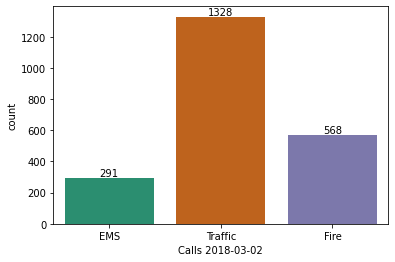

In [36]:
outliers1 = df[df['date']=='2018-03-02']['reason'].value_counts()[reason_order.index]
ax6=sns.countplot(x='reason',data=df[df['date']=='2018-03-02'],palette='Dark2',order=reason_order.index)
ax6.bar_label(container=ax6.containers[0],labels=outliers1)
ax6.set_xlabel("Calls 2018-03-02")

Mais de 1300 chamados com o motivo Traffic. Sabemos que em média EMS possui mais chamados que as outra razões, mas até Fire estava maior que EMS. Pode ter ocorrido algum evento neste dia em particular, seja um evento climático, um evento esportivo, um engavetamento ou outro motivo.

Após uma breve pesquisa, foi possível encontrar que a região teve uma severa tempestade de neve, onde o acúmulo médio de neve foi de mais de 10cm, com regiões chegando a 20cm.[[1](https://patch.com/pennsylvania/yardley/pennsylvania-town-town-snow-totals-march-2-2018-noreaster)] Esse excesso de neve prejudica muito o tráfego, e ainda pode causar interrupções na eletricidade. É provável que esta seja a razão pelo outlier nos gráficos.

Vamos agora observar o segundo outlier, de Novembro de 2018.

In [37]:
df.groupby(df[(df['year']==2018)&(df['monthnum']==11)]['date']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
date                                                                     
2018-11-01   374   374   374   325    374        374   374   374   374   
2018-11-02   534   534   534   482    534        534   534   534   534   
2018-11-03   651   651   651   562    651        651   650   651   651   
2018-11-04   323   323   323   281    323        323   323   323   323   
2018-11-05   457   457   457   401    457        457   456   457   457   
2018-11-06   495   495   495   441    495        495   495   495   495   
2018-11-07   439   439   439   389    439        439   439   439   439   
2018-11-08   464   464   464   399    464        464   464   464   464   
2018-11-09   458   458   458   418    458        458   458   458   458   
2018-11-10   420   420   420   379    420        420   420   420   420   
2018-11-11   295   295   295   269    295        295   294   295   295   
2018-11-12   438   438   438   389    438        438   438   438   438   
2018-11-13   437   437   437   371    437        437   436   437   437   
2018-11-14   401   401   401   350    401        401   400   401   401   
2018-11-15  1662  1662  1662  1458   1662       1662  1662  1662  1662   
2018-11-16   544   544   544   474    544        544   544   544   544   
2018-11-17   335   335   335   303    335        335   334   335   335   
2018-11-18   299   299   299   259    299        299   299   299   299   
2018-11-19   415   415   415   347    415        415   415   415   415   
2018-11-20   421   421   421   363    421        421   421   421   421   
2018-11-21   409   409   409   367    409        409   409   409   409   
2018-11-22   336   336   336   298    336        336   336   336   336   
2018-11-23   476   476   476   425    476        476   476   476   476   
2018-11-24   458   458   458   388    458        458   458   458   458   
2018-11-25   389   389   389   332    389        389   389   389   389   
2018-11-26   486   486   486   438    486        486   485   486   486   
2018-11-27   411   411   411   367    411        411   411   411   411   
2018-11-28   416   416   416   378    416        416   416   416   416   
2018-11-29   434   434   434   370    434        434   433   434   434   
2018-11-30   420   420   420   378    420        420   420   420   420   

            reason  date  year  hour  dayofweeknum  monthnum  dayofweek  month  
date                                                                            
2018-11-01     374   374   374   374           374       374        374    374  
2018-11-02     534   534   534   534           534       534        534    534  
2018-11-03     651   651   651   651           651       651        651    651  
2018-11-04     323   323   323   323           323       323        323    323  
2018-11-05     457   457   457   457           457       457        457    457  
2018-11-06     495   495   495   495           495       495        495    495  
2018-11-07     439   439   439   439           439       439        439    439  
2018-11-08     464   464   464   464           464       464        464    464  
2018-11-09     458   458   458   458           458       458        458    458  
2018-11-10     420   420   420   420           420       420        420    420  
2018-11-11     295   295   295   295           295       295        295    295  
2018-11-12     438   438   438   438           438       438        438    438  
2018-11-13     437   437   437   437           437       437        437    437  
2018-11-14     401   401   401   401           401       401        401    401  
2018-11-15    1662  1662  1662  1662          1662      1662       1662   1662  
2018-11-16     544   544   544   544           544       544        544    544  
2018-11-17     335   335   335   335           335       335        335    335  
2018-11-18     299   299   299   299           299       299        299    299  
2018-11-19     415   415

O pico de dados desta vez é no dia 15 de Novembro; olhando rapidamente, parece ser em torno de 4x a média das chamadas. Vamos isolar as chamadas por razão.

Text(0.5, 0, 'Calls 2018-11-15')

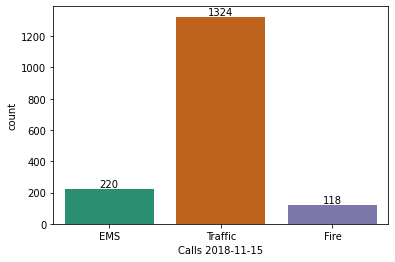

In [38]:
outliers2 = df[df['date']=='2018-11-15']['reason'].value_counts()[reason_order.index]
ax7=sns.countplot(x='reason',data=df[df['date']=='2018-11-15'],palette='Dark2',order=reason_order.index)
ax7.bar_label(container=ax7.containers[0],labels=outliers2)
ax7.set_xlabel("Calls 2018-11-15")

Mais uma vez, um excesso de chamadas por Traffic. Hipoteticamente, pode ser pelas mesmas razões do outro pico de chamadas, devido a um evento climático. E de fato, outra forte nevasca atingiu a região causando acidentes, tráfego pesado e diversas interrupções de energia.[[1](https://patch.com/pennsylvania/norristown/more-1-200-montgomery-co-peco-customers-without-power)]

Vamos ainda observar o terceiro outlier de dados. Dessa vez, em 2020.

Text(0, 0.5, 'Total')

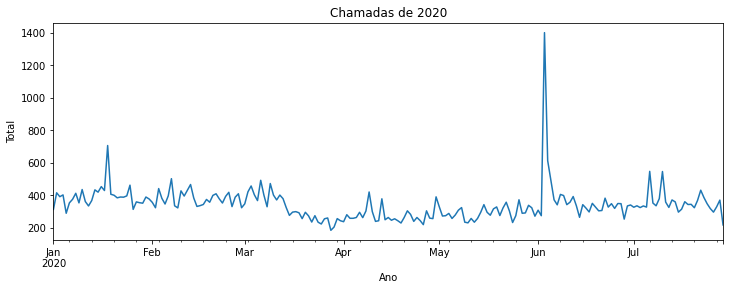

In [39]:
df.groupby(df[df['year']==2020]['date']).count().plot.line(use_index=True,y='title',figsize=(12,4),legend=None)
plt.title('Chamadas de 2020')
plt.xlabel('Ano')
plt.ylabel('Total')

Esse terceiro pico na distribuição está no início de Junho. Vamos isolar o mês e procurar este dia com mais chamadas e a distribuição por razões.

In [40]:
df.groupby(df[(df['year']==2020)&(df['monthnum']==6)]['date']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
date                                                                     
2020-06-01   308   308   308   283    308        308   308   308   308   
2020-06-02   274   274   274   251    274        274   274   274   274   
2020-06-03  1401  1401  1401  1283   1401       1401  1401  1401  1401   
2020-06-04   613   613   613   568    613        613   613   613   613   
2020-06-05   492   492   492   432    492        492   492   492   492   
2020-06-06   372   372   372   342    372        372   372   372   372   
2020-06-07   341   341   341   313    341        341   341   341   341   
2020-06-08   405   405   405   364    405        405   405   405   405   
2020-06-09   398   398   398   362    398        398   398   398   398   
2020-06-10   342   342   342   311    342        342   342   342   342   
2020-06-11   357   357   357   318    357        357   356   357   357   
2020-06-12   392   392   392   326    392        392   392   392   392   
2020-06-13   335   335   335   296    335        335   335   335   335   
2020-06-14   264   264   264   234    264        264   264   264   264   
2020-06-15   342   342   342   314    342        342   342   342   342   
2020-06-16   321   321   321   288    321        321   321   321   321   
2020-06-17   297   297   297   261    297        297   297   297   297   
2020-06-18   350   350   350   319    350        350   350   350   350   
2020-06-19   327   327   327   290    327        327   327   327   327   
2020-06-20   304   304   304   268    304        304   304   304   304   
2020-06-21   306   306   306   278    306        306   306   306   306   
2020-06-22   382   382   382   344    382        382   382   382   382   
2020-06-23   327   327   327   288    327        327   327   327   327   
2020-06-24   348   348   348   303    348        348   348   348   348   
2020-06-25   319   319   319   296    319        319   319   319   319   
2020-06-26   349   349   349   312    349        349   349   349   349   
2020-06-27   348   348   348   307    348        348   348   348   348   
2020-06-28   253   253   253   223    253        253   253   253   253   
2020-06-29   334   334   334   304    334        334   334   334   334   
2020-06-30   340   340   340   292    340        340   339   340   340   

            reason  date  year  hour  dayofweeknum  monthnum  dayofweek  month  
date                                                                            
2020-06-01     308   308   308   308           308       308        308    308  
2020-06-02     274   274   274   274           274       274        274    274  
2020-06-03    1401  1401  1401  1401          1401      1401       1401   1401  
2020-06-04     613   613   613   613           613       613        613    613  
2020-06-05     492   492   492   492           492       492        492    492  
2020-06-06     372   372   372   372           372       372        372    372  
2020-06-07     341   341   341   341           341       341        341    341  
2020-06-08     405   405   405   405           405       405        405    405  
2020-06-09     398   398   398   398           398       398        398    398  
2020-06-10     342   342   342   342           342       342        342    342  
2020-06-11     357   357   357   357           357       357        357    357  
2020-06-12     392   392   392   392           392       392        392    392  
2020-06-13     335   335   335   335           335       335        335    335  
2020-06-14     264   264   264   264           264       264        264    264  
2020-06-15     342   342   342   342           342       342        342    342  
2020-06-16     321   321   321   321           321       321        321    321  
2020-06-17     297   297   297   297           297       297        297    297  
2020-06-18     350   350   350   350           350       350        350    350  
2020-06-19     327   327

Text(0.5, 0, 'Calls 2020-06-03')

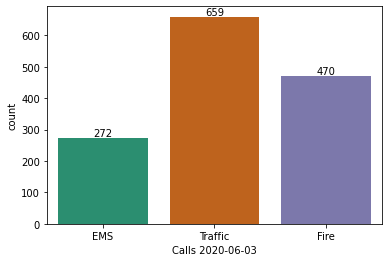

In [41]:
outliers3 = df[df['date']=='2020-06-03']['reason'].value_counts()[reason_order.index]
ax8=sns.countplot(x='reason',data=df[df['date']=='2020-06-03'],palette='Dark2',order=reason_order.index)
ax8.bar_label(container=ax8.containers[0],labels=outliers3)
ax8.set_xlabel("Calls 2020-06-03")

Novamente temos um excesso de chamadas por Traffic e Fire. Fazendo uma pesquisa, descobrimos que neste dia houve uma tempestade, um "Derecho" (ventos fortes como um tornado ou um furacão, porém em linha reta, sem girar como um tornado) na região, com ventos de até 130km/h, causando bastante transtorno. [[1](https://www.cbsnews.com/philadelphia/news/philadelphia-tornado-warning-derecho-severe-storms-three-people-dead-montgomery-county-hundreds-of-thousands-of-customers-without-power-region/)][[2](https://www.weather.gov/phi/EventReview20200603)]

É interessante notar que as três anomalias nos dados foram causados por eventos climáticos extremos, dois deles somente em 2018. Algo que está além do escopo desta análise seria investigar se o ano de 2018 foi diferente de outras tendências anuais de clima no Condado de Montgomery. Por exemplo, investigar porque, comparando com esse aumento massivo em 2018 e 2020, não tivemos tantas chamadas do 911 em um único dia de 2016, 2017 e 2019, caso tais fenômenos sejam repetidos anualmente. Pode haver uma quantidade de fatores (quedas de energia, radares climáticos, severidade do clima, etc) a serem observados para encontrar a fonte do que causou tal aumento nas chamadas do 911. E principalmente qual seria o potencial benefício de saber as causas, obter um ponto de vista mais amplo e se preparar para possíveis repetições dessas condições extremas.

Bem, esses picos no gráfico de linha foram descobertos observando o total de chamadas dia após dia. Podemos fazer o mesmo desenhando três gráficos, um para cada razão.

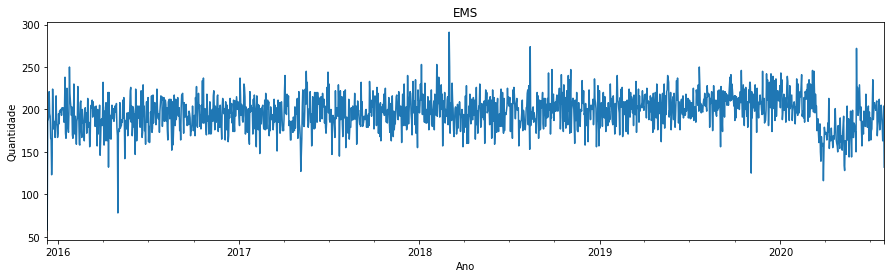

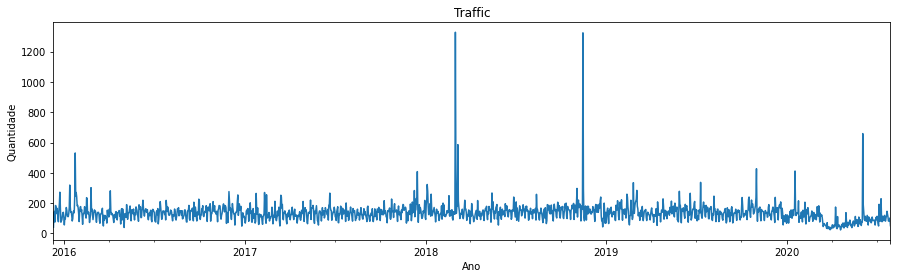

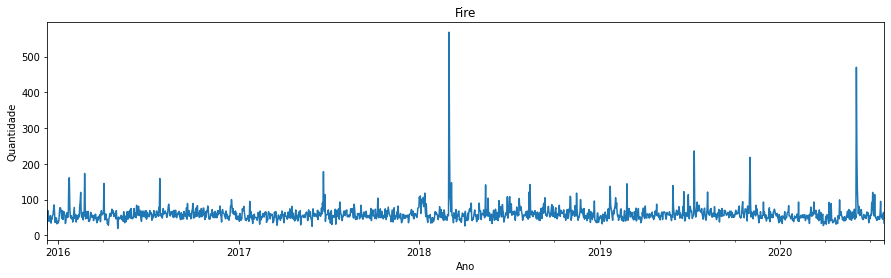

In [42]:
for r in reason_order.index:
    df[df['reason']==r].groupby('date').count().plot.line(use_index=True,y='title',figsize=(15,4),legend=None)
    plt.title(r)
    plt.xlabel('Ano')
    plt.ylabel('Quantidade')

Os dois primeiros gráficos são um tanto esperados -- o gráfico de Traffic tendo seus três grandes outliers investigados anteriormente, e o gráfico de EMS sendo mais ou menos regular, exceto alguns pontos abaixo da média. Não são exatamente outliers: não são valor zero pra indicar erro no dataset, mas parecem apenas uma diminuição (visualmente) aceitável na distribuição dos dados, o que é comum em qualquer dataset.

Um fato diferente é que, além dos três outliers conhecidos no gráfico de Traffic, há também dois grandes outliers em Fire. Ambos vieram em duas das datas que observamos os outliers do gráfico principal de chamados, e que constatamos ser principalmente de Traffic. Porém em todos eles havia um gráfico de barras numerando as três razões nesses dias, e Fire facilmente superava 400 chamados em ambos os casos. Visualmente podemos constatar que Fire permanece abaixo de 100 chamados diários em média. Dessa maneira compreendemos a importância de observar mais de perto em cada categoria de dados, especialmente aqueles que nos podem levar a conclusões: o clima severo não levou somente a um aumento massivo de incidentes de trânsito, mas também a um registro maior de incêndios e incidentes com fogo.

É possível ver também em Fire que há alguns picos menores, acima de 100 e raramente um pouco acima de 200 chamados, alguns deles em torno do meio do ano. Somados ao segundo outlier, em Junho-2020, isso talvez explique os picos que observamos no gráfico linear e na regressão linear mensais de Fire. É apenas uma hipótese, que pode ser respondida além do escopo desta análise. Também é possível, além do escopo desta análise, questionar o que levou a um aumento nos chamados por fogo em 02 de Março de 2018, mas não em 11 de Novembro de 2018, onde inicialmente as razões são semelhantes. Um aprendizado futuro seria melhorar a identificação e a prevenção de incidentes com fogo em condições semelhantes, analisando o que ocorreu e por quê.

Até aqui analisamos dados temporais relativos a anos, meses e dias. Vamos observar agora quadros relativos a dia da semana e hora do dia. Usaremos heatmaps para isso, mas será necessário reestruturar o dataframe, ou na verdade criar um novo a partir do objetivo que buscamos, para que cada coluna sejam horas e as linhas (i.e. os índices) sejam os dias da semana.

In [57]:
# pivotando a tabela pra hour x dayofweek. usei dayofweeknum para ordenar de segunda a domingo
df_wh = df.groupby(['dayofweeknum','dayofweek','hour']).count().unstack()['title']
df_wh

hour                      0     1     2     3     4     5     6     7     8   \
dayofweeknum dayofweek                                                         
0            Mon        1894  1571  1368  1272  1336  1844  2675  4430  5504   
1            Tue        1720  1459  1322  1213  1247  1741  2784  4425  5634   
2            Wed        1664  1484  1259  1265  1128  1609  2668  4644  5469   
3            Thu        1731  1408  1426  1236  1293  1775  2816  4432  5297   
4            Fri        1983  1635  1449  1296  1339  1639  2670  4143  5018   
5            Sat        2447  2059  1883  1592  1451  1580  1880  2489  3457   
6            Sun        2424  2135  1946  1614  1471  1488  1726  2408  3001   

hour                      9   ...    14    15    16    17    18    19    20  \
dayofweeknum dayofweek        ...                                             
0            Mon        5724  ...  5713  6289  6346  6408  5441  4488  3823   
1            Tue        5566  ...  5926  6252  6495  6883  5628  4621  3845   
2            Wed        5444  ...  6069  6533  6745  7062  5691  4686  4116   
3            Thu        5412  ...  6079  6493  6375  6935  5512  4703  4045   
4            Fri        5288  ...  6394  7040  7065  7113  5668  5056  4375   
5            Sat        4315  ...  5421  5181  5211  5213  4980  4753  4127   
6            Sun        3728  ...  4744  4475  4560  4505  4402  4135  3748   

hour                      21    22    23  
dayofweeknum dayofweek                    
0            Mon        3254  2658  2072  
1            Tue        3409  2708  2137  
2            Wed        3537  2826  2207  
3            Thu        3490  2844  2354  
4            Fri        3913  3422  2834  
5            Sat        3895  3226  2965  
6            Sun        3161  2629  2323  

[7 rows x 24 columns]

Text(0.5, 33.0, 'Hour')

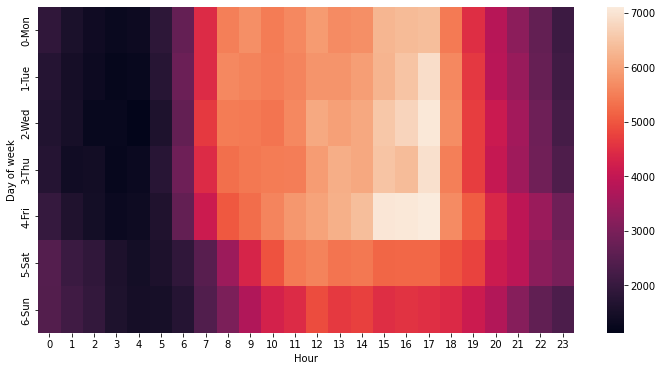

In [63]:
fig, ax9 = plt.subplots(figsize=(14,6))
sns.heatmap(data=df_wh,ax=ax9)
plt.ylabel('Day of week')
plt.xlabel('Hour')

Interessante observar como a maioria dos chamados ocorre em horáro comercial, quase sempre diminuindo drasticamente passando das 17h às 18h, progressivamente até as 0h com muito menos chamados durante a madrugada. Também há uma diminuição dos chamados nos finais de semana, porém nestes dias com um leve aumento na madrugada em relação às madrugadas dos dias de trabalho, em especial até as 2h~3h, e mantendo o padrão de mais chamados no horário comercial. 

Vamos gerar um clustermap para agrupar melhor os diferentes dias e horários.

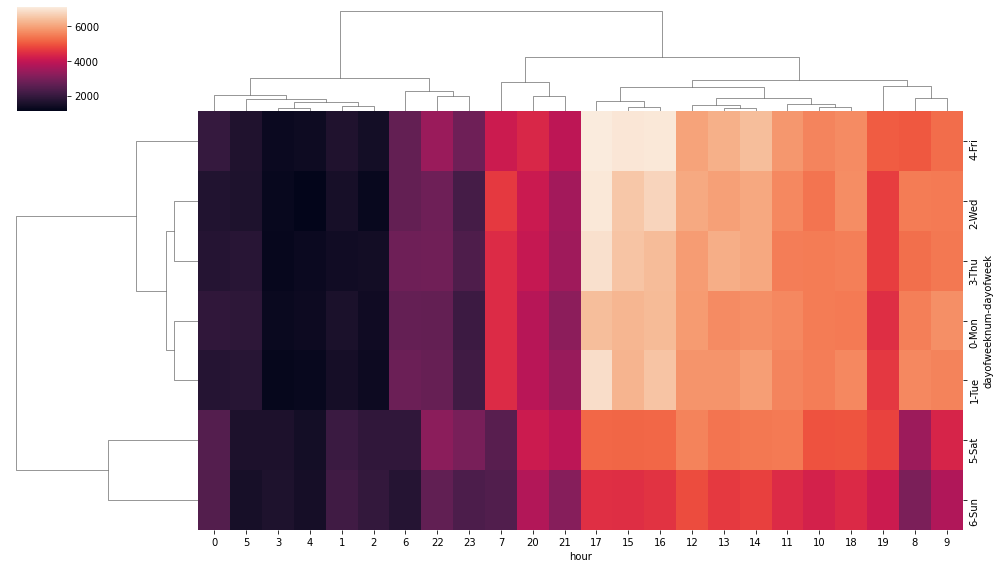

In [71]:
sns.clustermap(data=df_wh,figsize=(14,8))

Em um clustermap, cada dupla (de linha ou de coluna) tem relação maior entre si do que outras partes da distribuição de dados, e primeiramente de um nível mais baixo até um nível mais alto. A altura das linhas é também relevante. Assim, as colunas de 15h e 16h são muito relacionadas. Em seguida, são bem parecidas com 17h. Esse exemplo em particular mostra como essas horas possuem um número bem semelhante de chamadas; no caso, os maiores registros. Essas três colunas só passam a ser um tanto similares com 12h, 13h, 14h, 11h, 10h e 18h, e isso que esses seis períodos de hora também possuem diferentes níveis de semelhança entre si. O mesmo vale para as linhas: quarta-feira e quinta-feira são bem semelhantes, assim como segunda e terça entre si, e esses quatro dias são relativamente próximos na distribuição dos dados. Por outro lado, sábado e domingo são similares entre si, porém não tanto quanto outros dias são melhor relacionados e, enquanto dupla, seus dados estão bem isolados dos outros dias.

Que perspectivas podemos destacar? Encontramos informações esperadas, como uma relação mais forte entre horários adjacentes (15h, 16h, 17h), e entre dias à parte (sábado e domingo). Porém, por exemplo, também encontramos uma similaridade entre 10h e 18h. Há semelhança entre as 6h e a dupla 22h-23h, porém mais ligados às horas de menos chamados, e outra entre 7h e 20h-21h, mas um pouco mais ligados às horas de mais chamados. A sexta-feira é um tanto destacada dos dias de segunda à quinta, porém ainda distante dos dados no fim de semana. 19h parece diferente dos outros horários com mais chamados, entretanto, ainda é bem melhor relacionada a estes do que aos períodos com menos chamados.

Esse tipo de informação é útil para que se monitore os diferentes dias da semana e horários do dia e investigue causas e correlações para ter mais ou menos chamados. Por mais que algumas respostas sejam óbvias, o registro é importante. É algo a buscar além do escopo desta análise.

Agora, vamos ver um heatmap entre dia da semana e mês.

In [74]:
df_wm = df.groupby(['dayofweeknum','monthnum',]).count().unstack()['title']
df_wm


monthnum        1     2      3     4     5     6     7     8     9     10  \
dayofweeknum                                                                
0             8896  8747   8060  8410  7881  8511  9499  6854  6598  8075   
1             9714  8087   8372  7561  9026  8349  9086  7291  6601  7948   
2             9409  8296   8989  7602  9041  9443  8581  7984  6844  7876   
3             9055  7997   8849  7722  8740  9489  8378  7508  6954  7482   
4             9309  8255  10941  7997  8904  9207  8681  7336  7694  6934   
5             8475  7593   8050  7514  7223  8198  7748  6111  6566  6609   
6             7478  6452   6766  6865  6694  6837  7859  5275  5956  6316   

monthnum        11    12  
dayofweeknum              
0             6722  8492  
1             7344  8305  
2             7410  7682  
3             8358  8151  
4             8379  9305  
5             6773  8592  
6             5196  7165

<AxesSubplot:xlabel='monthnum', ylabel='dayofweeknum'>

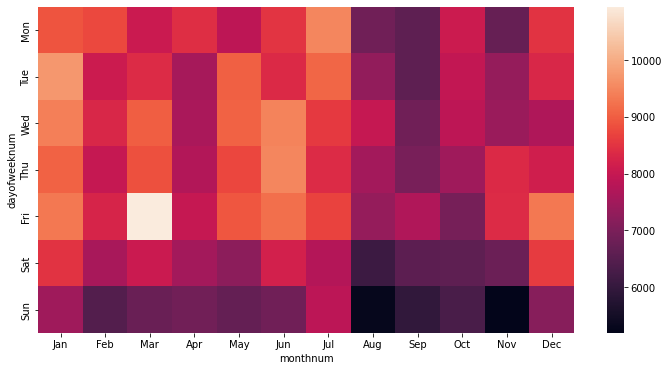

In [75]:
fig,ax10 = plt.subplots(figsize=(12,6))
sns.heatmap(data=df_wm,ax=ax10,xticklabels=monthlist,yticklabels=daylist)

Encontramos aqui um quadrado com muitos registros de chamados, destoando dos outros pontos do mapa de calor. Uma sexta-feira, em um mês de março.

In [83]:
df['dayofweek'][df['date']=='2018-03-02']

315303    Fri
315304    Fri
315305    Fri
315306    Fri
315307    Fri
         ... 
317485    Fri
317486    Fri
317487    Fri
317488    Fri
317489    Fri
Name: dayofweek, Length: 2187, dtype: object

Conhecemos o outlier do dia 02 de Março de 2018, e verificando, aqui está, é uma sexta-feira. Este quadrado, representando todas as sextas-feiras em meses de Março, é certamente influenciado por deste dia. É interessante notar que, embora tenhamos outros outliers em Novembro e Junho, eles não parecem ser muito diferentes dos outros meses da distribuição. Na verdade, como os dados começam em Dezembro e terminam em Julho, temos aquele gap de Agosto a Novembro verificado anteriormente. Vamos então agrupar os dados e observar quem é similar com o quê.

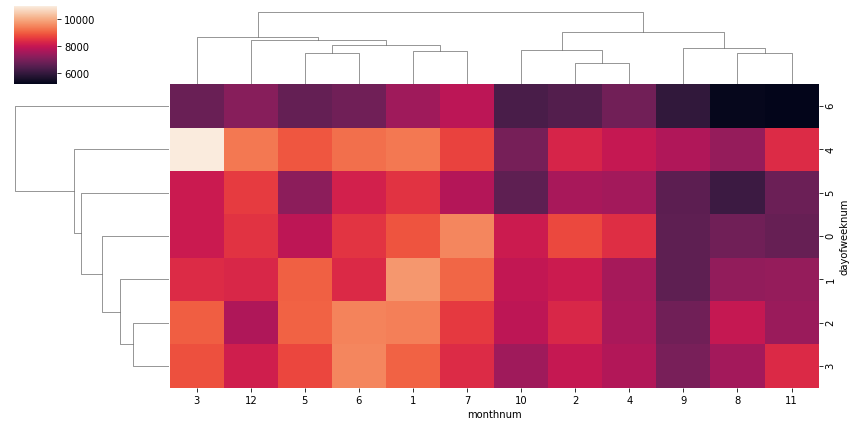

In [85]:
sns.clustermap(data=df_wm,figsize=(12,6),)

Curiosamente, mesmo com menos dados no dataset, outubro possui mais semelhança com fevereiro e abril, primeiramente. Só depois ele terá alguma proximidade com agosto e novembro (que são bem relacionados entre si) e setembro. Nesse clustermap o domingo tem mais similaridades com a sexta-feira (ainda que não tanta) do que com o sábado. São particularidades de um ponto de vista diferente a partir desse agrupamento de dados mês x dia da semana. Todavia, o domingo ainda permanece sendo o dia com menos chamadas no geral, diferente dos outros dias.

## Conclusão

Exploramos e analisamos aqui o dataset Emergency 911 Calls Montgomery County (Chamadas de Emergência do 911 do Condado de Montgomery) do Kaggle. Pudemos aplicar diferentes técnicas de manipulação e transformação de dados e de visualização e interpretação dos dados. Através da biblioteca Pandas carregamos o dataset num formato para ser observado, reorganizado e analisado, e utilizamos as bibliotecas Matplotlib e Seaborn para construir gráficos, mapas e linhas para visualização. 

Mesmo com alguns dados faltantes (seja por falta de registro em algumas colunas, seja por ter um ano incompleto de dados), foi possível aprender bastante sobre essa distribuição de dados. Descobrimos três principais categorias de chamados do 911: EMS, Traffic e Fire, do maior para o menor em ordem de chamados. Encontramos três outliers: em 02.03.2018, em 15.11.2018 e em 03.06.2020, todos devido a eventos climáticos severos. É possível buscar mais informações, causas, correlações e respostas estendendo o escopo de pesquisa através desta análise.

É minha primeira análise em notebook com um kernel do Kaggle. Todo feedback construtivo é bem vindo! 